In [1]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('mpg').dropna()

# 두 변수 선택: 무게(weight)와 가속력(acceleration)
X = df[['weight', 'acceleration']]
y = df['mpg']

# 회귀 모델 학습
model = LinearRegression().fit(X, y)

# 회귀 계수 확인
print("스케일링 전 계수:", dict(zip(X.columns, model.coef_)))


스케일링 전 계수: {'weight': np.float64(-0.007293095113825714), 'acceleration': np.float64(0.26165039648878785)}


In [3]:
print(df[['weight', 'acceleration']].head())

   weight  acceleration
0    3504          12.0
1    3693          11.5
2    3436          11.0
3    3433          12.0
4    3449          10.5


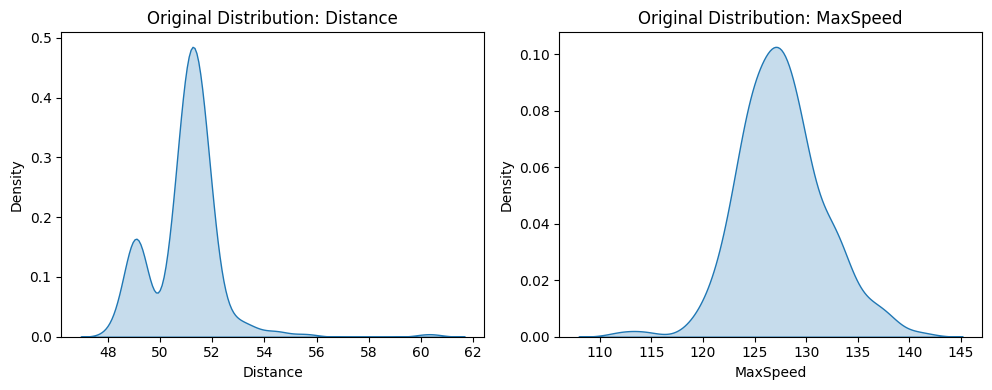

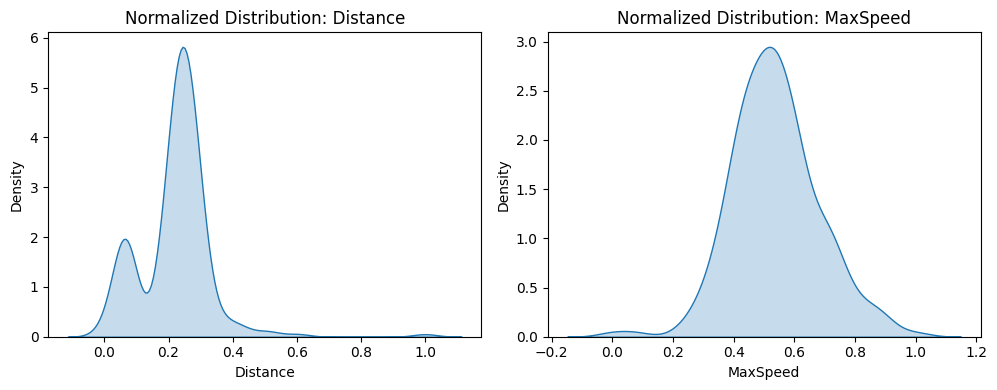

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# CSV 데이터 불러오기
url = "https://openmv.net/file/travel-times.csv"
df = pd.read_csv(url)

# 사용할 변수 선택 및 결측치 제거
features = ['Distance', 'MaxSpeed']
df_selected = df[features].dropna()

# 1. 정규화 전 분포 시각화
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_selected[col], fill=True)
    plt.title(f'Original Distribution: {col}')
plt.tight_layout()
plt.show()

# 2. Min-Max 정규화 수행
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)

# 3. 정규화 후 분포 시각화
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_scaled[col], fill=True)
    plt.title(f'Normalized Distribution: {col}')
plt.tight_layout()
plt.show()

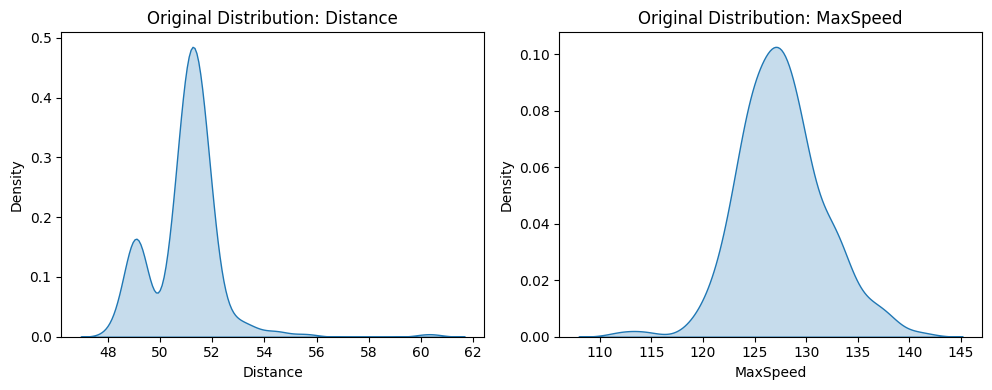

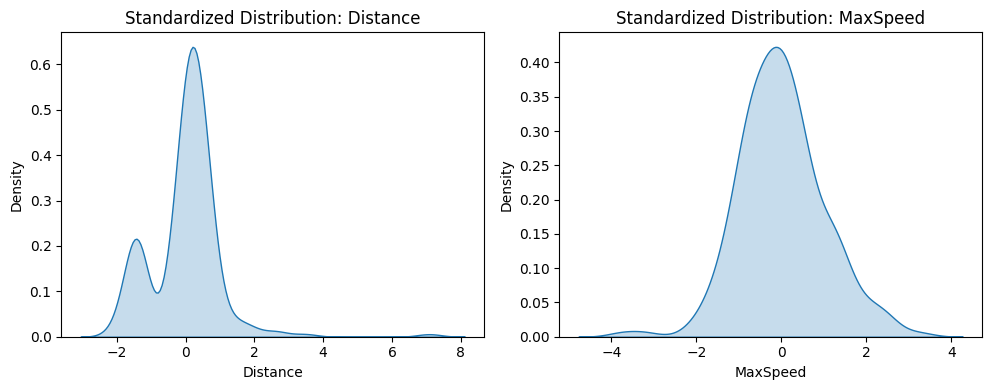

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# CSV 데이터 불러오기
url = "https://openmv.net/file/travel-times.csv"
df = pd.read_csv(url)

# 사용할 변수 선택 및 결측치 제거
features = ['Distance', 'MaxSpeed']
df_selected = df[features].dropna()

# 1. 원래 분포 시각화
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_selected[col], fill=True)
    plt.title(f'Original Distribution: {col}')
plt.tight_layout()
plt.show()

# 2. 표준화 (StandardScaler) 적용
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)

# 3. 표준화 후 분포 시각화
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_standardized[col], fill=True)
    plt.title(f'Standardized Distribution: {col}')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# origin 범주형 열 확인
print(df['DayOfWeek'].unique())

# Label Encoding 수행
encoder_label = LabelEncoder()
df['DayOfWeek_label'] = encoder_label.fit_transform(df['DayOfWeek'])

# 인코딩 결과 확인
print(df[['DayOfWeek', 'DayOfWeek_label']].head(10))


['Friday' 'Wednesday' 'Tuesday' 'Monday' 'Thursday']
   DayOfWeek  DayOfWeek_label
0     Friday                0
1     Friday                0
2  Wednesday                4
3  Wednesday                4
4    Tuesday                3
5    Tuesday                3
6     Monday                1
7     Monday                1
8     Friday                0
9   Thursday                2


In [17]:
# origin 범주형 열 확인
print(df['DayOfWeek'].unique())

df_onehot = pd.get_dummies(df, columns=['DayOfWeek'])

# 원-핫 인코딩 결과 확인
print(df_onehot.head())


['Friday' 'Wednesday' 'Tuesday' 'Monday' 'Thursday']
       Date StartTime GoingTo  Distance  MaxSpeed  AvgSpeed  AvgMovingSpeed  \
0  1/6/2012     16:37    Home     51.29     127.4      78.3            84.8   
1  1/6/2012     08:20     GSK     51.63     130.3      81.8            88.9   
2  1/4/2012     16:17    Home     51.27     127.4      82.0            85.8   
3  1/4/2012     07:53     GSK     49.17     132.3      74.2            82.9   
4  1/3/2012     18:57    Home     51.15     136.2      83.4            88.1   

  FuelEconomy  TotalTime  MovingTime Take407All Comments  DayOfWeek_label  \
0         NaN       39.3        36.3         No      NaN                0   
1         NaN       37.9        34.9         No      NaN                0   
2         NaN       37.5        35.9         No      NaN                4   
3         NaN       39.8        35.6         No      NaN                4   
4         NaN       36.8        34.8         No      NaN                3   

   DayOfW

In [19]:
# 가짜 변수 함정 회피
df_onehot = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)

# 원-핫 인코딩 결과 확인
print(df_onehot.head(1))

       Date StartTime GoingTo  Distance  MaxSpeed  AvgSpeed  AvgMovingSpeed  \
0  1/6/2012     16:37    Home     51.29     127.4      78.3            84.8   

  FuelEconomy  TotalTime  MovingTime Take407All Comments  DayOfWeek_label  \
0         NaN       39.3        36.3         No      NaN                0   

   DayOfWeek_Monday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
0             False               False              False   

   DayOfWeek_Wednesday  
0                False  
